<a href="https://colab.research.google.com/github/SriNithin965/cognizant_internship/blob/main/timeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true
!cp Sample-Superstore.xls?raw=true superstore.xls


--2022-04-06 12:18:50--  https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/a-forty-two/diamler_17_jan/raw/main/Sample-Superstore.xls [following]
--2022-04-06 12:18:50--  https://github.com/a-forty-two/diamler_17_jan/raw/main/Sample-Superstore.xls
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a-forty-two/diamler_17_jan/main/Sample-Superstore.xls [following]
--2022-04-06 12:18:51--  https://raw.githubusercontent.com/a-forty-two/diamler_17_jan/main/Sample-Superstore.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199

In [2]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

     |████████████████████████████████| 9.9 MB 4.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
import pandas as pd

In [4]:
data = pd.read_excel('/content/superstore.xls')

In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
for name in data.columns:
  print(name , end=" ")
  print(data[name].value_counts().count())

Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 6144
Quantity 14
Discount 12
Profit 7545


In [8]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()
data1.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [9]:
import matplotlib.pyplot as plt

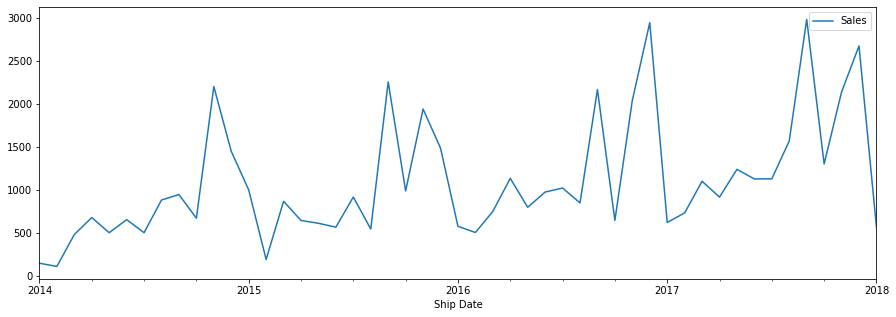

In [10]:
data1.plot(figsize=(15,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


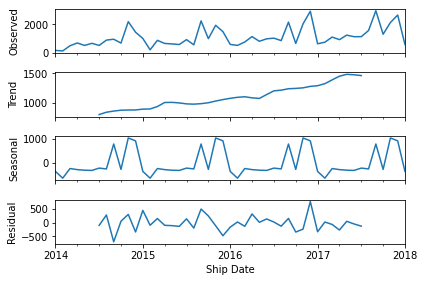

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = data1
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

In [12]:
import warnings
import itertools
import numpy as np
import statsmodels.api as sm

**here  we generating the true table for the three values p,d,q**

In [13]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
print(pdq)



[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


**here we adding the seasons to true table of p,d,q**

In [16]:
seasons = 12
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] 
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

**here the p -  Auto Regressive order for the seasonal component
q - indicates Moving Average order for the seasonal component
d - indicates the integration order of the seasonal process 
we going through the truetable values where the combinations of p,d,q there and we find the best possible combination where the AIC is minimum 
AIC - which indicates the loss of the model min it is better the model is**

In [17]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(data1, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
**** Smallest PDQ,SPDQ is *****
343.9431159320116
(1, 1, 1)
(1, 1, 0, 12)


**here we bulit the model which was resulted in previous operation**

---



In [19]:
model = sm.tsa.statespace.SARIMAX(data1, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
results = model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -167.972
Date:                            Wed, 06 Apr 2022   AIC                            343.943
Time:                                    12:28:21   BIC                            348.485
Sample:                                01-01-2014   HQIC                           345.085
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4102      0.277     -1.482      0.138      -0.953       0.132
ma.L1         -0.9987     11.014     -0.091      0.928     -22.585      20.587
ar.S.L12      -0.6179      0.207     -2.985      0.003      -1.024      -0.212
sigma2      1.171e+05   1.28e+06      0.092      0.927   -2.38e+06    2.62e+06
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 5.91
Prob(Q):                               nan   Prob(JB):                         0.05
Heteroskedasticity (H):               3.58   Skew:                             1.04
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

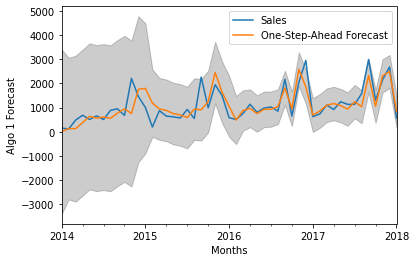

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data1['2014':].plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show() 

**We did the grid search to find which combination of parameters we include
p -  Auto Regressive order for the seasonal component
q - indicates Moving Average order for the seasonal component
d - indicates the integration order of the seasonal process 
SEASONS -> manipulated manually -> at what point should I expect repetition
AIC - Akaike's Information Criterion is a loss function we used to find the right combination**